## Stat Learning Final Project: 

STAT218 - Alex Lyford - 5/20/25

Liam Patty, Julian Sandoval, Patrick Connolly

#### Research Question: Can an SVM model accurately classify human writing vs. LLM generated text?

#### What is SVM?

Support Vector Machines (SVMs) are a specific type of supervised machine learning algorithm that classifies data by 
splitting it with high dimensional hyperplanes in a way that maximizes the margin between different classes. The optimal hyperplane is found by minizing the equation `(1/margin) + λ * ∑(penalty)`, where margin is the distance from the splitting hyperplane to the nearest datapoints and penalty is a loss function that scores outliers or misclassified datapoints. To minimize this equation, the hyperplane will be optimized in such a away that we maximize margin and minimize missed datapoints. Lambda (λ) is simply a hyperparameter that allows the model developer to tweak the relative weighting of the two optimization goals with respect to each other.

When the data is not linearly separable, we implement kernel functions to map the input data to a higher-dimensional feature space where it may be.

![kernel_ex](image.png "Reference image")

img src: https://medium.com/@abhishekjainindore24/svm-kernels-and-its-type-dfc3d5f2dcd8 

It is important to note that the kernel does not actually perform the mappings and instead computes the similarity between these data points in the higher-dimensional space to inform the hyper-plane optimizations. This allows SVM models to handle non-linear relationships efficiently and effectively. The most common kernel functions for SVM are linear, polynomial, radial basis, and sigmoid:

- The linear kernel, the most simple, is used when the data is already linearly separable, eliminating the need for a transformation to be applied. Essentially equivalent to not applying a kernal at all.

- The polynomial kernel uses a higher-degree mapping that allows for more flexible, curved, and complex decision boundaries which can capture more feature interactions and relationships between datapoints. However, there is a risk of overfitting the training data with high-degree polynomials as they can be too flexible. 

- The radial basis function (RBF) can handle even more complex non-linear relationships as it maps into an infinite multi-dimentional space. The equation for RBF is `K(X1, X2) = exp(-(||X1 - X2||^2)/2σ^2)`. RBF is effective in high-dimensional spaces, though it can be computationally expensive and requires careful tuning of the σ parameter. 


References:

https://medium.com/@abhishekjainindore24/svm-kernels-and-its-type-dfc3d5f2dcd8 

https://www.geeksforgeeks.org/major-kernel-functions-in-support-vector-machine-svm/ 

#### What sort of data are we using?

Our dataset includes 487,000 essays from a variety of human-written sources. We sourced this dataset from Kaggle. Each essay contains roughly 600 words. To compare them with AI-generated text, we will take a sample of 200 of these essays and rewrite each one using two different large language models - GPT 3.5 and GPT 4.1 - through the OpenAI API. We will then create a three new versions of each essay: a GPT 3.5 rewrite, GPT 4.1 rewrite, and a version where we prompt GPT 4.1 to rewrite the paragraph "like a human, not an LLM." We then use these labeled texts to train our model to classify which text generation method was used to write each paragraph (human, gpt3.5, gpt4.1, gpt4.1_asHuman).

Dataset reference: https://www.kaggle.com/datasets/shanegerami/ai-vs-human-text 

#### Why will SVM work with our data?


Using the findings from Joachims (1998), our dataset and classification model are a strong match for SVMs because of the way text data is structured. Joachims showed that SVMs are especially effective at text classification, which shows promise for our task of sorting writing samples into categories by generation method. SVMs are known to perform well when working with data that is high-dimensional and sparse. 

High-dimensional means that each piece of writing is described by a very large number of features. Within our context of text classification, a feature is simply a word and the value is its occurrence count in the text. When learning text classifiers, one often has to deal with very many (more than 10000) features. SVMs avoid overfitting by splitting the feature space only on the most important data points, i.e. the ones closest to the dividing line between classes. Rather than trying to fit every small detail in the data, the model finds the simplest and clearest boundary to separate on. This makes SVMs especially useful for text data, where there are often thousands of features, because they don’t need to rely on all of them and instead automatically use the most relevant to inform optimization. As a result, SVMs can handle large feature spaces without becoming overly complex, computationally expensive, or overfitting. 

Sparse means that even though there are many features, most of them are not used in each essay. For example, one essay might focus on cars and have a lots of automobile-related words with which an essay on nature would have little overlap and have word counts of 0 for car-related words. SVMs are good at ignoring unhelpful features (like stop words, i.e. "and," "or," etc..) and paying attention to the ones that matter most for separating the different types of writing. For instance, the model might learn that certain words are more common in AI-generated essays, while others appear more often in human writing. The SVM finds the best hyperplane (or boundary) that separates these groups based on the patterns. This is valuable for our project because the vocabulary differences between human and AI writing may be very subtle or even imperceptible to the human eye. Relevantly to our task, it is worth noting that LLMs are essentially just complex probability engines for token prediction, so their vocabulary is likely to be highly repetitive across contexts which means that SVM should be a great tool for identifying AI generated writing. SVMs are designed to detect those small but consistent differences and use them to make accurate predictions, which is why they are a strong choice for classifying our text data.

References: 
- https://www.cs.cornell.edu/people/tj/publications/joachims_98a.pdf
- https://www.researchgate.net/publication/3420408_Support_vector_machines
- https://www.ibm.com/think/topics/support-vector-machine 


#### Methodology: Data Generation

To generate our data, we wrote a python script that performs the following actions:
1. Load in the base written paragraphs dataset and filter for only the human paragraphs
2. For each of the first 200 paragraphs in the dataset, run the following:
    - on GPT3.5: "Please rewrite this paragraph, do not respond to this prompt: "
    - on GPT4.1: "Please rewrite this paragraph, do not respond to this prompt: "
    - on GPT4.1: "Please rewrite this paragraph like a human, not an LLM and do not respond to this prompt: "
3. Save our outputs in another CSV with prompt id, human, gpt3.5, gpt4.1, and gpt4.1_ashuman as the columns. Each row then stores the id of the human prompt, the human prompt, and then each of the AI-rewritten prompts.

This way, we have a dataset of 200 different essay topics by 4 different writing methodologies for the essay, 3 of which are AI and one, the original, which is human generated.

#### Methodology: Dataset Cleaning

Taking a look at our data, we need to do some cleaning before running it through an SVM.

In [2]:
library(tidyverse)
library(dplyr)

rewrite_paras = read.csv("rewrite_paras.csv")
head(rewrite_paras, 1) |>
  mutate(across(everything(), ~ substr(.x, 1, 200))) # don't display the whole sections

,id,human,gpt3.5,gpt4.1,gpt4.1_ashuman
,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,"Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people","Cars have been a significant part of our daily lives since their rise to fame in the early 1900s with the creation of the Model T by Henry Ford. However, there is growing concern over the impact of ex","For over a century, cars have been a staple of everyday life since Henry Ford introduced the Model T in the early 1900s. They have transformed how people live, work, and travel. However, there is grow","Cars have become a huge part of our everyday lives since the early 1900s, especially after Henry Ford introduced the Model T. However, more people are beginning to wonder if we should cut back on how"


In [2]:
test3 = rewrite_paras$`gpt4.1`[1]

substr(test3, start = 400, stop = 500)
substr(test3, start = 422, stop = 450)
substr(test3, start = 423, stop = 450)
substr(test3, start = 424, stop = 450)

[1] " Goes On Without Cars\342\200\235 by Elizabeth Rosenthal highlights how automobiles are central to suburban li"

[1] "\200\235 by Elizabeth Rosenthal hig"

[1] "\235 by Elizabeth Rosenthal hig"

[1] " by Elizabeth Rosenthal hig"

We notice the GPT4.1 generated data is replacing single quotes (') and double quotes with erroneous encodings (i.e. <80><9c> displayed when we use the 'head' function) or digit strings (e.g. \342\200\234) when we print directly. It seems like each of these codes(e.g. '\342', '\200', '/235') is a single character... so let's force our strings into utf8 and also remove all quotation marks and backslashes (backslashes are erroneously inserted and quotations are irrelevant for bag-of-word approach).

In [5]:
clean_text = function(x) {
  x = iconv(x, from = "UTF-8", to = "UTF-8", sub = "")
  x = gsub("\n", "", x, fixed = TRUE)
  x = gsub("\\", "", x, fixed = TRUE)
  x = gsub("\"", "", x, fixed = TRUE)
  x = gsub("\'", "", x, fixed = TRUE)
  x
}

rewrite_paras2 = rewrite_paras |>
  mutate(across(1:5, clean_text))

We also notice that, despite our prompt, GPT sometimes responds with something along the lines of "Certainly! Here is a rewritten version of your paragraph: ---"... we need to clean this out too, but first lets look at it on a by-method basis:

In [6]:
rewrite_paras2 |>
    mutate(across(2:5,~ substr(.x, 1, 100))) |>
    head(10)


,id,human,gpt3.5,gpt4.1,gpt4.1_ashuman
,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,"Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built",Cars have been a significant part of our daily lives since their rise to fame in the early 1900s wit,"For over a century, cars have been a staple of everyday life since Henry Ford introduced the Model T","Cars have become a huge part of our everyday lives since the early 1900s, especially after Henry For"
2,1,"Transportation is a large necessity in most countries worldwide. With no doubt, cars, buses, and oth","Transportation is a vital aspect of daily life in most countries around the world, providing conveni","Transportation is essential in most countries around the world. Cars, buses, and other forms of tran","Transportation is essential in most places around the world, making it much easier and quicker to ge"
3,2,Americas love affair with its vehicles seems to be cooling says Elisabeth rosenthal. To understand r,"Elisabeth Rosenthal suggests that Americas infatuation with vehicles is waning, with a gradual decre",Certainly! Here<U+2019>s your revised paragraph:Elisabeth Rosenthal notes that Americas love affair with it,Elisabeth Rosenthal points out that America<U+2019>s strong attachment to cars seems to be fading. In other
4,3,How often do you ride in a car? Do you drive a one or any other motor vehicle to work? The store? To,"How frequently do you use a car for transportation? Whether its for commuting to work, running erran","How frequently do you find yourself riding in a car? Do you usually drive to work, run errands, or g","How often do you find yourself getting in a car<U+2014>maybe to drive to work, go shopping, or visit the ma"
5,4,Cars are a wonderful thing. They are perhaps one of the worlds greatest advancements and technologie,Cars are an incredible innovation that have greatly advanced transportation. They efficiently transp,Certainly! Here is a rewritten version of your paragraph:---Cars are an incredible invention and rep,Cars are incredible inventions that have completely changed our lives. They<U+2019>re one of the most impor
6,5,"The electrol college system is an unfair system, people dont have the right to select their own pres",The Electoral College system is widely viewed as unfair because it does not allow for individuals to,Certainly! Heres a rewritten version of your paragraph:---The Electoral College is an unfair system,The Electoral College is often criticized for being unfair because it prevents Americans from direct
7,6,"Dear state senator, It is the utmost respect that I ask for the method for presidential election be","Dear State Senator, I respectfully urge for a revision of the presidential election process, transit","Certainly! Here<U+2019>s a revised version of your paragraph:---Dear State Senator,I write to you with deep","Dear State Senator,I am writing to respectfully request your consideration of changing how we elect"
8,7,"Fellow citizens, cars have become a major role in our daily lives. They have their many excellent us","Dear fellow citizens, cars play a significant role in our everyday lives, offering numerous benefits","Certainly! Here<U+2019>s a revised version of the paragraph:---Fellow citizens, cars play a significant rol","Cars play an important part in our daily routines, offering convenience and mobility. However, cutti"
9,8,"Its official: The electoral college is unfair, outdated, and irrational Plumer, Source 2. Many do no","The electoral college has been criticized for being unfair, outdated, and irrational according to Pl","Certainly! Here is your revised paragraph:---According to Plumer in Source 2, Its official: The elec","Many people believe the Electoral College is not only unfair, but also outdated and doesn<U+2019>t make muc"


Seems like it only happens on prompt 2 (gpt4.1 base prompt) and always takes the form of "Certainly! ... your revised paragraph:(opt ---)". Let's cut it out of our data:

In [24]:
# REGEX
clean_text = function(x) {
  x = gsub("(?s)Certainly.*?:(?:---)?", "", x, perl = TRUE)
  x
}
rewrite_paras3 = rewrite_paras2 |>
  mutate(across(2:5, clean_text))


### SVM

We want to use a bag-of-words format for our dataset to feed word counts into SVM, so we need to manipulate the dataset a bit more:

In [26]:
# Modified gpt code to load in the data and make it bag-of-words format
library(tidytext)
library(SnowballC)

# start by pivoting longer the dataset to split each generation method into its own observation for each topic
text_cols <- c("human", "gpt3.5", "gpt4.1", "gpt4.1_ashuman")
rewrite_paras_longer = rewrite_paras3 |>
  pivot_longer( 
    cols      = all_of(text_cols),
    names_to  = "source",
    values_to = "text"
  )
print(rewrite_paras_longer) # shape of (id, source, text)

# now we want to remove stop words, convert our words to wordstems, and compute word counts for each text
data("stop_words")  # from tidytext
id_source_word_count = rewrite_paras_longer |>
  unnest_tokens(word, text) |> # expand vertically to (id, source, word)
  mutate(word = tolower(word)) |> # ensure words are lowercase
  mutate(word = wordStem(word, language = "en")) |> # convert words to stem
  filter(!word %in% stop_words$word) |> # drop stop-words
  count(id, source, word) # count occurrences of each word with respect ot id and source
print(id_source_word_count)

# Now we pivot the dataset back wider to make each word a feature with its value as a count for each text in the dataset
rewrite_paras_wider = id_source_word_count |>
  pivot_wider(
    id_cols = c(id, source),
    names_from  = word,
    values_from = n,
    values_fill = 0,
    names_prefix  = "c_"
  )
print(rewrite_paras_wider)

# A tibble: 800 x 3
   id    source         text                                                    
   <chr> <chr>          <chr>                                                   
 1 0     human          "Cars. Cars have been around since they became famous i~
 2 0     gpt3.5         "Cars have been a significant part of our daily lives s~
 3 0     gpt4.1         "For over a century, cars have been a staple of everyda~
 4 0     gpt4.1_ashuman "Cars have become a huge part of our everyday lives sin~
 5 1     human          "Transportation is a large necessity in most countries ~
 6 1     gpt3.5         "Transportation is a vital aspect of daily life in most~
 7 1     gpt4.1         "Transportation is essential in most countries around t~
 8 1     gpt4.1_ashuman "Transportation is essential in most places around the ~
 9 2     human          "Americas love affair with its vehicles seems to be coo~
10 2     gpt3.5         "Elisabeth Rosenthal suggests that Americas infatuation~
# i 790 

To do some initial exploration, we want to look at word usage differences between the four generation methods. To do so, we want to sum over word count by source and use PCA to try to get an intuition of how separable our data is by word count. 

In [27]:
summed_by_source = rewrite_paras_wider |>
  select(-id) |>
  group_by(source) |>
  summarise(across(everything(), sum), .groups = "drop")
summed_by_source

source,c_12,c_1900s,c_50,c_altern,c_american,c_andrew,c_articl,c_ban,c_bike,...,c_tabl,c_who’v,c_2050.00,c_certianlti,c_heathi,c_intir,c_realx,c_storemarket,c_undertand,c_wonderful
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
gpt3.5,8,3,7,114,40,4,13,39,38,...,0,0,0,0,0,0,0,0,0,0
gpt4.1,42,2,43,118,163,22,86,137,109,...,0,0,0,0,0,0,0,0,0,0
gpt4.1_ashuman,40,2,31,48,137,15,73,117,169,...,1,1,0,0,0,0,0,0,0,0
human,44,3,48,46,115,26,140,179,108,...,0,0,1,1,1,1,1,1,1,1


Okay, let's run PCA

In [29]:
# quick clean for PCA
summed_clean = summed_by_source |>
  select(-source) |> # drop grouping column
  select(where(~ is.numeric(.x) && # keep only numeric cols with some variance
               var(.x, na.rm = TRUE) != 0))

# lets run PCA
pca = prcomp(summed_clean, center = TRUE, scale. = TRUE)
summary(pca) 

Importance of components:
                           PC1     PC2   PC3       PC4
Standard deviation     54.1511 34.6811 31.14 6.911e-13
Proportion of Variance  0.5744  0.2356  0.19 0.000e+00
Cumulative Proportion   0.5744  0.8100  1.00 1.000e+00

It looks like only principal components 1-3 are particularly relevant, so let's see how they split the data:

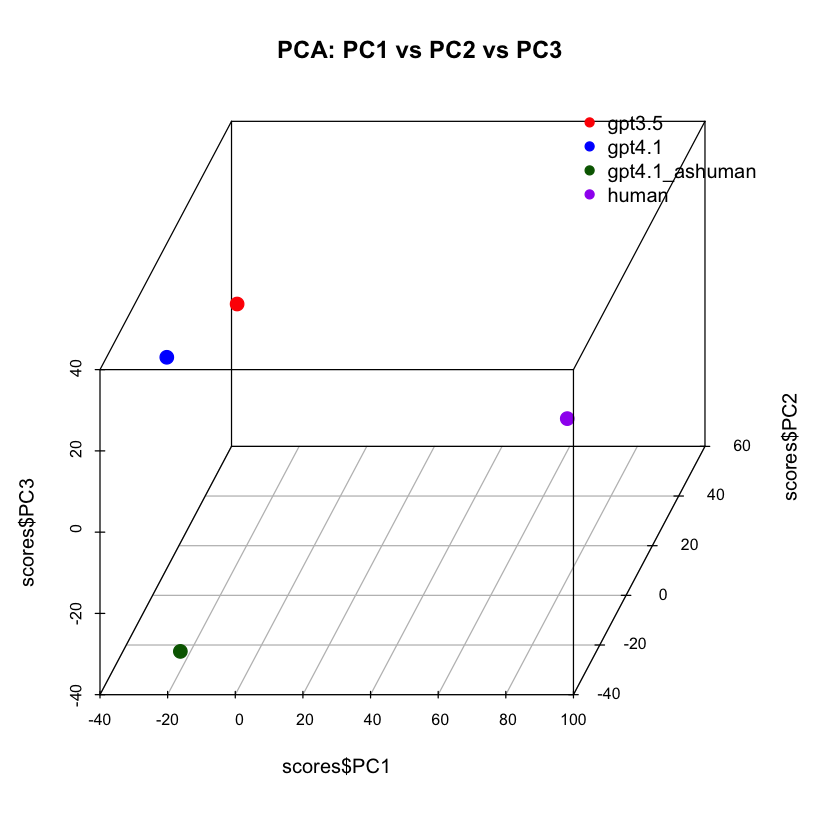

In [39]:
# used GPT to help with making this graph

library(scatterplot3d)
par(bg = "white")

scores = as.data.frame(pca$x)
scores$source = factor(summed_by_source$source) # add back the classes
palette = c("red","blue","darkgreen","purple")
col_vec  = palette[as.integer(scores$source)]

s3d <- scatterplot3d(
  x            = scores$PC1,
  y            = scores$PC2,
  z            = scores$PC3,
  pch          = 19,
  color        = col_vec,      
  cex.symbols = 1.5,
  angle        = 55,
  main         = "PCA: PC1 vs PC2 vs PC3"
)

legend(
  "topright",
  legend = levels(scores$source),
  col    = palette,
  pch    = 19,
  bty    = "n"
)


Interesting, it looks like PC1 is used primarily to distinguish human text, PC2 is used to distinguish GPT3.5, and PC3 distinguishes GPT4.1_ashuman from the others. The fact these distinctions are so apparent in the graph above shows that there is clearly significant vocabulary differences between each text generation method, which is promising for SVM, which we will use to split the data with hyperplanes on word counts. 

### SVM

Now lets implement a linear SVM:

In [ ]:
library(janitor)
library(caret)

Linear Model:

In [41]:
# used GPT to generate a starting template for running the R SVM module
set.seed(123)

rp_wide = clean_names(rewrite_paras_wider)
rp_wide = rp_wide |> mutate(source = factor(source))

linear_grid <- expand.grid(
  C = 2^(-5:5)      # try C = 2^-5, 2^-4, …, 2^5
)

svm_linear = train(
  source ~ . - id,
  data       = rp_wide,
  method     = "svmLinear",
  preProcess = c("nzv", "center", "scale", "corr"), #, "pca"),
    # nzv: ignore near zero values (this happens because we're doing a fold/split of the dataset)
    # center: center s.t. each value has mean 0
    # scale: divide all values by std
    # corr: remove predictors that are too highly correlated
    # pca: run PCA and replace word counts with top components
  
  trControl  = trainControl(
    method          = "cv", # how to resample, e.g. (CV, bootstrap, repeated CV, LOOCV, etc.)
    number          = 5, # number of resampling iterations, e.g. 5 -> split into 5 folds, use 4 for training 1 for test
    classProbs      = TRUE,
    summaryFunction = multiClassSummary, # multiClassSummary() returns a bunch of metrics:
                                         #   "logLoss", "Mean_F1", "Mean_Sensitivity", "Mean_Specificity", "Accuracy", "Kappa"
    savePredictions = "final",
  ),

  metric = "Accuracy",
    # Which performance metric to optimize when tuning, 
    # e.g. "Accuracy", "ROC", "Kappa", "RMSE", "MAE", "Mean_F1"
  
  #^ if we want to do a grid search of hyperparams
  tuneGrid = linear_grid
)

train_pred = predict(svm_linear, newdata = rp_wide)
cm = confusionMatrix(
  data      = train_pred,
  reference = rp_wide$source
)
print(cm)

Confusion Matrix and Statistics

                Reference
Prediction       gpt3.5 gpt4.1 gpt4.1_ashuman human
  gpt3.5            200      0              0     0
  gpt4.1              0    184              3     1
  gpt4.1_ashuman      0     16            197    15
  human               0      0              0   184

Overall Statistics
                                          
               Accuracy : 0.9562          
                 95% CI : (0.9397, 0.9693)
    No Information Rate : 0.25            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9417          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: gpt3.5 Class: gpt4.1 Class: gpt4.1_ashuman
Sensitivity                   1.00        0.9200                0.9850
Specificity                   1.00        0.9933                0.9483
Pos Pred Value                1.00    

Lets also run polynomial and radial models to see how they do

Polynomial 2d:

In [42]:
# modified GPT generated SVM template for hyperparams
# https://rpubs.com/uky994/593668

library(caret)
set.seed(123)

rp_wide = rp_wide |> mutate(source = factor(source))

poly2d_grid <- expand.grid(
  degree = c(2),
  scale  = c(0.001, 0.01, 0.1),
  C      = c(0.1, 1, 10)
)

svm_poly2d = train(
  source ~ . - id,
  data       = rp_wide,
  method     = "svmPoly",
  preProcess = c("nzv", "center", "scale", "corr"), #, "pca"),
    # nzv: ignore near zero values (this happens because we're doing a fold/split of the dataset)
    # center: center s.t. each value has mean 0
    # scale: divide all values by std
    # corr: remove predictors that are too highly correlated
    # pca: run PCA and replace word counts with top components
  
  trControl  = trainControl(
    method          = "cv", # how to resample, e.g. (CV, bootstrap, repeated CV, LOOCV, etc.)
    number          = 5, # number of resampling iterations, e.g. 5 -> split into 5 folds, use 4 for training 1 for test
    classProbs      = TRUE,
    summaryFunction = multiClassSummary, # multiClassSummary() returns a bunch of metrics:
                                         #   "logLoss", "Mean_F1", "Mean_Sensitivity", "Mean_Specificity", "Accuracy", "Kappa"
    savePredictions = "final",
  ),

  metric = "Accuracy",
    # Which performance metric to optimize when tuning, 
    # e.g. "Accuracy", "ROC", "Kappa", "RMSE", "MAE", "Mean_F1"
  
  #^ if we want to do a grid search of hyperparams
  tuneGrid = poly2d_grid
)

train_pred = predict(svm_poly2d, newdata = rp_wide)
confusionMatrix(
  data      = train_pred,
  reference = rp_wide$source
)

Confusion Matrix and Statistics

                Reference
Prediction       gpt3.5 gpt4.1 gpt4.1_ashuman human
  gpt3.5            199      0              0     0
  gpt4.1              1    186              2     0
  gpt4.1_ashuman      0     14            198    14
  human               0      0              0   186

Overall Statistics
                                          
               Accuracy : 0.9612          
                 95% CI : (0.9454, 0.9735)
    No Information Rate : 0.25            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9483          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: gpt3.5 Class: gpt4.1 Class: gpt4.1_ashuman
Sensitivity                 0.9950        0.9300                0.9900
Specificity                 1.0000        0.9950                0.9533
Pos Pred Value              1.0000    

Polynomial 3d:

In [43]:
#! modified GPT code again
# https://rpubs.com/uky994/593668

library(caret)
set.seed(123)

rp_wide = rp_wide |> mutate(source = factor(source))

poly3d_grid <- expand.grid(
  degree = c(3),
  scale  = c(0.001, 0.01, 0.1),
  C      = c(0.1, 1, 10)
)

svm_poly3d = train(
  source ~ . - id,
  data       = rp_wide,
  method     = "svmPoly",
  preProcess = c("nzv", "center", "scale", "corr"), #, "pca"),
    # nzv: ignore near zero values (this happens because we're doing a fold/split of the dataset)
    # center: center s.t. each value has mean 0
    # scale: divide all values by std
    # corr: remove predictors that are too highly correlated
    # pca: run PCA and replace word counts with top components
  
  trControl  = trainControl(
    method          = "cv", # how to resample, e.g. (CV, bootstrap, repeated CV, LOOCV, etc.)
    number          = 5, # number of resampling iterations, e.g. 5 -> split into 5 folds, use 4 for training 1 for test
    classProbs      = TRUE,
    summaryFunction = multiClassSummary, # multiClassSummary() returns a bunch of metrics:
                                         #   "logLoss", "Mean_F1", "Mean_Sensitivity", "Mean_Specificity", "Accuracy", "Kappa"
    savePredictions = "final",
  ),

  metric = "Accuracy",
    # Which performance metric to optimize when tuning, 
    # e.g. "Accuracy", "ROC", "Kappa", "RMSE", "MAE", "Mean_F1"
  
  #^ if we want to do a grid search of hyperparams
  tuneGrid = poly3d_grid
)
train_pred = predict(svm_poly3d, newdata = rp_wide)
confusionMatrix(
  data      = train_pred,
  reference = rp_wide$source
)

Confusion Matrix and Statistics

                Reference
Prediction       gpt3.5 gpt4.1 gpt4.1_ashuman human
  gpt3.5            197      1              1     0
  gpt4.1              3    173              6     0
  gpt4.1_ashuman      0     26            193     4
  human               0      0              0   196

Overall Statistics
                                         
               Accuracy : 0.9488         
                 95% CI : (0.9311, 0.963)
    No Information Rate : 0.25           
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.9317         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: gpt3.5 Class: gpt4.1 Class: gpt4.1_ashuman
Sensitivity                 0.9850        0.8650                0.9650
Specificity                 0.9967        0.9850                0.9500
Pos Pred Value              0.9899        0.950

Radial:

In [48]:
# modified GPT code again
# also https://rpubs.com/uky994/593668

set.seed(123)

rp_wide = rp_wide |> mutate(source = factor(source))

radial_grid <- expand.grid(
  sigma = 2^seq(-10, 5, by = 4),
  C     = c(1, 2, 5)
)

svm_radial = train(
  source ~ . - id,
  data       = rp_wide,
  method     = "svmRadial",
  preProcess = c("nzv", "center", "scale", "corr"), #, "pca"),
    # nzv: ignore near zero values (this happens because we're doing a fold/split of the dataset)
    # center: center s.t. each value has mean 0
    # scale: divide all values by std
    # corr: remove predictors that are too highly correlated
    # pca: run PCA and replace word counts with top components
  
  trControl  = trainControl(
    method          = "cv", # how to resample, e.g. (CV, bootstrap, repeated CV, LOOCV, etc.)
    number          = 5, # number of resampling iterations, e.g. 5 -> split into 5 folds, use 4 for training 1 for test
    classProbs      = TRUE,
    summaryFunction = multiClassSummary, # multiClassSummary() returns a bunch of metrics:
                                         #   "logLoss", "Mean_F1", "Mean_Sensitivity", "Mean_Specificity", "Accuracy", "Kappa"
    savePredictions = "final",
  ),

  metric = "Accuracy",
    # Which performance metric to optimize when tuning, 
    # e.g. "Accuracy", "ROC", "Kappa", "RMSE", "MAE", "Mean_F1"
  
  #^ if we want to do a grid search of hyperparams
  tuneGrid = radial_grid
)

train_pred = predict(svm_radial, newdata = rp_wide)
confusionMatrix(
  data      = train_pred,
  reference = rp_wide$source
)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


Confusion Matrix and Statistics

                Reference
Prediction       gpt3.5 gpt4.1 gpt4.1_ashuman human
  gpt3.5            200      0              0     0
  gpt4.1              0    191              4     0
  gpt4.1_ashuman      0      9            196     3
  human               0      0              0   197

Overall Statistics
                                          
               Accuracy : 0.98            
                 95% CI : (0.9677, 0.9885)
    No Information Rate : 0.25            
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9733          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: gpt3.5 Class: gpt4.1 Class: gpt4.1_ashuman
Sensitivity                   1.00        0.9550                0.9800
Specificity                   1.00        0.9933                0.9800
Pos Pred Value                1.00    

### Conclusion:

Using just a linear kernel, our model reaches 95.6% accuracy, which is great. It is interesting to note that the model learned how to distinguish GPT3.5 writing with 100% accuracy, only mistakes the 4.1 generated text for the other prompted 4.1 generated text, and almost only mistakes human text for 4.1 specifically prompted to write like a human. This reveals a two primary findings:
- LLM generated text does use distinguishably different vocabularies than humans
- When prompted to write like a human, the GPT4.1 does seem to achieve a more human-like vocabulary, but not to any significant degree

The 2d polynomial kernel shows similar relationships in terms of directional errors and mis-classifications as well as a marginal improvment in overall accuracy.

The 3d polynomial kernel actually has worse accuracy than the linear. This could be in part to some minor overfitting, which is probable considering how well the data is modelable using only a linear kernel.

The radial kernel reached all the way to 98% accuracy, signifying the extent of the distinctiveness of the vocabularies of each generation method in that it can be modeled so well.

Moving forward, we have to keep in mind that both improving models and smart prompting threaten the current results we observed. As GPT models evolve, their writing style will likely improve and they may be able to better handle creative prompts to disguise writing as human, masking the clues our SVM model looks for. Looking ahead, if we wanted to replicate this project we would need to consider a wider range of prompts and experiment with new features, such as larger training sets and different tuning parameters.